In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, recall_score, precision_score, make_scorer, mean_absolute_error
from sklearn.model_selection import GridSearchCV, ParameterGrid, KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action='ignore')

%autosave 120

Autosaving every 120 seconds


In [2]:
data = pd.read_csv('tic-tac-toe.data.txt', names = ['V1', 'V2', 'V3', 'V4', 'V5','V6', 'V7', 'V8', 'V9', 'V10'])
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [3]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
count,958,958,958,958,958,958,958,958,958,958
unique,3,3,3,3,3,3,3,3,3,2
top,x,x,x,x,x,x,x,x,x,positive
freq,418,378,418,378,458,378,418,378,418,626


In [4]:
#Check values data type for each column 
#--> observe, we have just object data types 
#--> need to change to numerical(continues) data type
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
V1     958 non-null object
V2     958 non-null object
V3     958 non-null object
V4     958 non-null object
V5     958 non-null object
V6     958 non-null object
V7     958 non-null object
V8     958 non-null object
V9     958 non-null object
V10    958 non-null object
dtypes: object(10)
memory usage: 74.9+ KB


In [5]:
print(data['V1'].value_counts())
print(type(data['V1'][0]))

x    418
o    335
b    205
Name: V1, dtype: int64
<class 'str'>


In [6]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [7]:
#Change object data type --> numerical data type
#More precise: x - 0; o - 1; b - 2, positive - 1, negative - 0;
dic = {'x': 0, 'o': 1, 'b': 2, 'positive': 1, 'negative': 0}

def data_type_change():
    for name in data.columns:
        data['{}'.format(name)] = data['{}'.format(name)].map(dic)
    return data

data_type_change()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,0,0,0,0,1,1,0,1,1,1
1,0,0,0,0,1,1,1,0,1,1
2,0,0,0,0,1,1,1,1,0,1
3,0,0,0,0,1,1,1,2,2,1
4,0,0,0,0,1,1,2,1,2,1
5,0,0,0,0,1,1,2,2,1,1
6,0,0,0,0,1,2,1,1,2,1
7,0,0,0,0,1,2,1,2,1,1
8,0,0,0,0,1,2,2,1,1,1
9,0,0,0,0,2,1,1,1,2,1


We have Binary classification task, because we have 2 types of Targe value:<br>
 - 'positive' --> 1
 - 'negative' --> 0

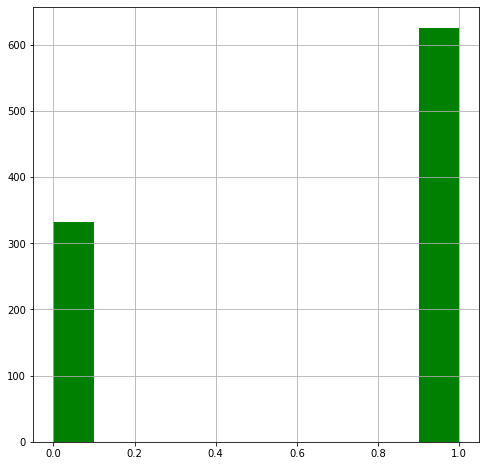

In [8]:
#Check the balance of target classes
plt.figure(figsize=(8,8))
plt.grid()
plt.hist(data['V10'], color='g');

In [9]:
#Split our data on X and y 

X = data.drop('V10', axis = 1)
y = data['V10']

In [10]:
X.shape, y.shape

((958, 9), (958,))

### We will use GridSearchCrossVAlidation to find the best estimator

### Support Vector Classification

In [17]:
param_grid = {'C': [1, 10], 'kernel': ('linear', 'rbf')}


list_of_evaluated_metrics = ['mean_test_precision', 'mean_test_recall', 'mean_test_accuracy']

clf = GridSearchCV(SVC(), param_grid, n_jobs=1, cv=10, refit='accuracy' ,scoring={'accuracy', 'recall', 'precision'}).fit(X, y)
    
[print('{0}:  {1}'.format(metric_evaluated, clf.cv_results_['{}'.format(metric_evaluated)])) for metric_evaluated in list_of_evaluated_metrics]

[print('best {0}:  {1}'.format(metric_evaluated, max(clf.cv_results_['{}'.format(metric_evaluated)]))) for metric_evaluated in list_of_evaluated_metrics]
  

mean_test_precision:  [0.65344468 0.81705172 0.65344468 0.97341123]
mean_test_recall:  [1.         0.94391424 1.         0.96154356]
mean_test_accuracy:  [0.65344468 0.82359081 0.65344468 0.95407098]
best mean_test_precision:  0.9734112327014206
best mean_test_recall:  1.0
best mean_test_accuracy:  0.954070981210856


In [18]:
acc_svc, rec_svc, pre_svc = 0.954070981210856, 1.0, 0.9734112327014206

### Logistic Regression 

In [12]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = KFold(n_splits=10, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,refit='accuracy' ,scoring={'accuracy', 'recall', 'precision'},error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))
means_test_precision = grid_result.cv_results_['mean_test_precision']
means_test_accuracy = grid_result.cv_results_['mean_test_accuracy']
means_test_recall = grid_result.cv_results_['mean_test_recall']
params = grid_result.cv_results_['params']

pre_log = 0
rec_log = 0
acc_log = grid_result.best_score_

for mean_test_precision, mean_test_accuracy, mean_test_recall, param in zip(means_test_precision, means_test_accuracy, means_test_recall, params):
    if mean_test_precision >= pre_log:
        pre_log = mean_test_precision
    if mean_test_recall >= rec_log:
        rec_log = mean_test_recall
    print("precision - {}, recall- {}, accuracy- {}, \n with: {}".format(mean_test_precision, mean_test_recall, mean_test_accuracy, param))

print("accuracy: {} \n precision: {} \n recall: {}".format(acc_log, pre_log, rec_log))

Best: 0.5146137787056367 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
precision - 0.6305444034045287, recall- 0.3846346555323591, accuracy- 0.37891440501043844, 
 with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
precision - 0.6305444034045287, recall- 0.3846346555323591, accuracy- 0.37891440501043844, 
 with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
precision - 0.6305444034045287, recall- 0.3846346555323591, accuracy- 0.37891440501043844, 
 with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
precision - 0.6305444034045287, recall- 0.3846346555323591, accuracy- 0.37891440501043844, 
 with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
precision - 0.6305444034045287, recall- 0.3846346555323591, accuracy- 0.37891440501043844, 
 with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
precision - 0.6316189030176504, recall- 0.3855949895615866, accuracy- 0.37891440501043844, 
 with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
precision - 0.63161890301765

### KNeighborsClassifier

In [13]:
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = KFold(n_splits=10, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, refit='accuracy', scoring={'accuracy', 'recall', 'precision'},error_score=0)
grid_result = grid_search.fit(X, y)


# summarize results
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))
means_test_precision = grid_result.cv_results_['mean_test_precision']
means_test_accuracy = grid_result.cv_results_['mean_test_accuracy']
means_test_recall = grid_result.cv_results_['mean_test_recall']
params = grid_result.cv_results_['params']

pre_kn = 0
rec_kn = 0
acc_kn = grid_result.best_score_

for mean_test_precision, mean_test_accuracy, mean_test_recall, param in zip(means_test_precision, means_test_accuracy, means_test_recall, params):
    if mean_test_precision >= pre_kn:
        pre_kn = mean_test_precision
    if mean_test_recall >= rec_kn:
        rec_kn = mean_test_recall
    print("precision - {}, recall- {}, accuracy- {}, \n with: {}".format(mean_test_precision, mean_test_recall, mean_test_accuracy, param))

print("accuracy: {} \n precision: {} \n recall: {}".format(acc_kn, pre_kn, rec_kn))

Best: 0.7108559498956158 using {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
precision - 0.6583483031509444, recall- 0.6284759916492693, accuracy- 0.7004175365344467, 
 with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
precision - 0.6583483031509444, recall- 0.6284759916492693, accuracy- 0.7004175365344467, 
 with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
precision - 0.6619052851335019, recall- 0.6224634655532358, accuracy- 0.7108559498956158, 
 with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
precision - 0.6619052851335019, recall- 0.6224634655532358, accuracy- 0.7108559498956158, 
 with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
precision - 0.6638830897703549, recall- 0.5960334029227558, accuracy- 0.662839248434238, 
 with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
precision - 0.6638830897703549, recall- 0.5960334029227558, accuracy- 0.662839248434238, 
 wit

### RandomForestClassifier

In [14]:
### RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = KFold(n_splits=10, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, refit='accuracy' ,scoring={'accuracy', 'recall', 'precision'},error_score=0)
grid_result = grid_search.fit(X, y)


# summarize results
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))
means_test_precision = grid_result.cv_results_['mean_test_precision']
means_test_accuracy = grid_result.cv_results_['mean_test_accuracy']
means_test_recall = grid_result.cv_results_['mean_test_recall']
params = grid_result.cv_results_['params']

pre_rf = 0
rec_rf = 0
acc_rf = grid_result.best_score_

for mean_test_precision, mean_test_accuracy, mean_test_recall, param in zip(means_test_precision, means_test_accuracy, means_test_recall, params):
    if mean_test_precision >= pre_rf:
        pre_rf = mean_test_precision
    if mean_test_recall >= rec_rf:
        rec_rf = mean_test_recall
    print("precision - {}, recall- {}, accuracy- {}, \n with: {}".format(mean_test_precision, mean_test_recall, mean_test_accuracy, param))

print("accuracy: {} \n precision: {} \n recall: {}".format(acc_rf, pre_rf, rec_rf))

Best: 0.6085594989561587 using {'max_features': 'sqrt', 'n_estimators': 1000}
precision - 0.659911400784154, recall- 0.47720250521920665, accuracy- 0.558455114822547, 
 with: {'max_features': 'sqrt', 'n_estimators': 10}
precision - 0.6557138967050922, recall- 0.5427974947807933, accuracy- 0.5970772442588727, 
 with: {'max_features': 'sqrt', 'n_estimators': 100}
precision - 0.6557138967050922, recall- 0.558455114822547, accuracy- 0.6085594989561587, 
 with: {'max_features': 'sqrt', 'n_estimators': 1000}
precision - 0.671988210733145, recall- 0.4511064718162839, accuracy- 0.5532359081419624, 
 with: {'max_features': 'log2', 'n_estimators': 10}
precision - 0.6551282914674389, recall- 0.5417536534446764, accuracy- 0.5887265135699373, 
 with: {'max_features': 'log2', 'n_estimators': 100}
precision - 0.6557138967050922, recall- 0.5521920668058455, accuracy- 0.5981210855949896, 
 with: {'max_features': 'log2', 'n_estimators': 1000}
accuracy: 0.6085594989561587 
 precision: 0.671988210733145 


### GradientBoostingClassifier

In [15]:
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]

# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = KFold(n_splits=10, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, refit='accuracy' ,scoring={'accuracy', 'recall', 'precision'},error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))
means_test_precision = grid_result.cv_results_['mean_test_precision']
means_test_accuracy = grid_result.cv_results_['mean_test_accuracy']
means_test_recall = grid_result.cv_results_['mean_test_recall']
params = grid_result.cv_results_['params']

pre_gr = 0
rec_gr = 0
acc_gr = grid_result.best_score_

for mean_test_precision, mean_test_accuracy, mean_test_recall, param in zip(means_test_precision, means_test_accuracy, means_test_recall, params):
    if mean_test_precision >= pre_gr:
        pre_gr = mean_test_precision
    if mean_test_recall >= rec_gr:
        rec_gr = mean_test_recall
    print("precision - {}, recall- {}, accuracy- {}, \n with: {}".format(mean_test_precision, mean_test_recall, mean_test_accuracy, param))

print("accuracy: {} \n precision: {} \n recall: {}".format(acc_gr, pre_gr, rec_gr))

Best: 0.8705636743215032 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
precision - 0.6534446764091858, recall- 0.7014613778705637, accuracy- 0.6534446764091858, 
 with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
precision - 0.6534446764091858, recall- 0.7014613778705637, accuracy- 0.6534446764091858, 
 with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
precision - 0.6534446764091858, recall- 0.7014613778705637, accuracy- 0.6534446764091858, 
 with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
precision - 0.6534446764091858, recall- 0.7014613778705637, accuracy- 0.6534446764091858, 
 with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
precision - 0.6534446764091858, recall- 0.7014613778705637, accuracy- 0.6534446764091858, 
 with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
pre

### Comparison table

In [16]:
result = pd.DataFrame(np.array([['SVC',acc_svc, pre_svc, rec_svc],['Logistic Regression',acc_log, pre_log, rec_log], ['KNeighborsClassifier',acc_kn, pre_kn, rec_kn], ['RandomForestClassifier',acc_rf, pre_rf, rec_rf], ['GradientBoostingClassifier',acc_gr, pre_gr, rec_gr]]), columns=['model', 'accuracy', 'precision', 'recall'])

result

,model,accuracy,precision,recall
0,SVC,0.954070981210856,0.9734112327014206,1.0
1,Logistic Regression,0.5146137787056367,0.652423044463199,0.5607098121085594
2,KNeighborsClassifier,0.7108559498956158,0.6638830897703549,0.6284759916492693
3,RandomForestClassifier,0.6085594989561587,0.671988210733145,0.558455114822547
4,GradientBoostingClassifier,0.8705636743215032,0.6718221647211032,0.7014613778705637
